# Richardson Number (the gradient one...)  Ri

Ri is a diminsionless number which relates the vertical stratification to the vertical shear. It is and indication if the stratification is stable.

To break the stratification is necessary energy, which comes from the kinetik energy (currents!)

The Ri is ubiquitous tool when we are dealing with coastal hidrodynamics, where there are sources of boyancy to generate stratification, especially due to the input of freshwater

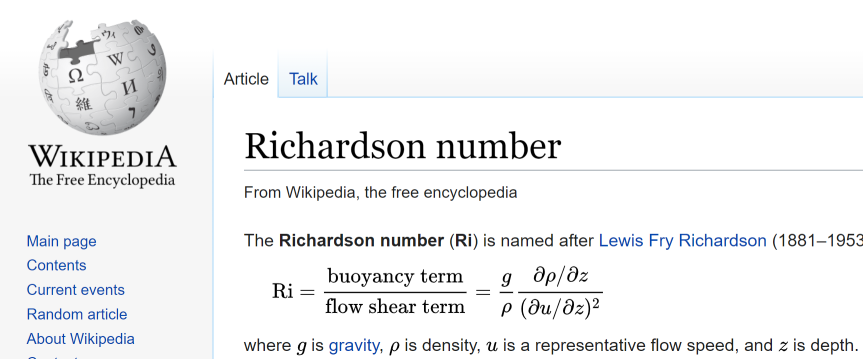

In [1]:
# Loading the Python packages to do numerics and plotting
import numpy as np
import matplotlib.pyplot as plt

In order to calculate the Ri, we need some numbers... a vertical profile of velocity and a vertical profile of density!

For the vertical profile of velocity, we can use the Law of the Wall as a guess...

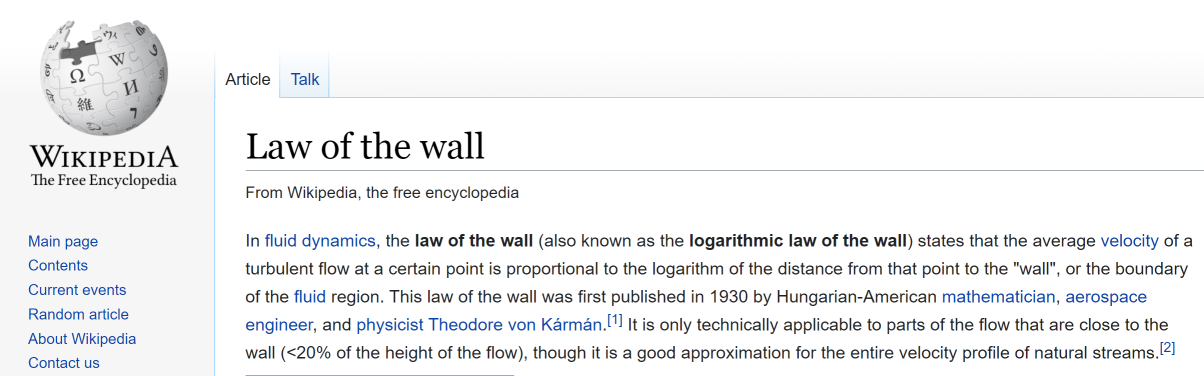

The equation of the Law of the Wall:

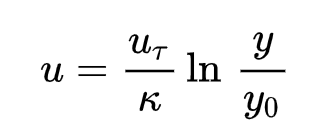


 u<sub>&tau;</sub> ou u<sub>*</sub> is the frictional velocity, which can be obtained by
 
 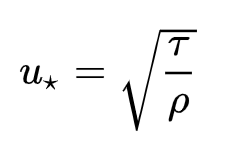
 
 Where &tau; is the bed shear stress and &rho; is the water density. The bed shear stress can be calculated by
 
 &tau; = &rho;  c<sub>D</sub>  u<sup>2</sup>
 
 Where c<sub>D</sub> is a drag coefficient (about ~0.002), and u is the current speed, usually at 1 m above the bed!
 
 k is a constant (von Karmann = 0.4), y is the distance from the bed (wall) and y<sub>0</sub> the roughness coeficient, usually the mean grain size.
 
 The solution give us how the flow velocity varies as function of the distance of the bed (y in the equation). So, firstly we need to create a domain where we can find the function: an array with the distance from the bed = z
 

In [2]:
# z is an array starting at 0.001 and goes up to 20 with intervals of 0.1. For us, this is in meters!
z = np.arange(0.001, 20, .1)

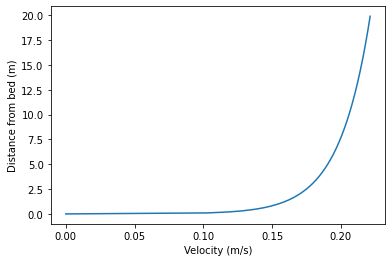

In [3]:
# defining the parameters

# density
rho = 1000  # kg/m3

# drag coefficient
cd = 0.002 # dimensionless

# a reasonable value for the velocity at 1 m above the bed...
u = 0.2    # m/s

# bed shear stress
tau = rho * cd * u**2

# frictional velocity 
u_f = (tau / rho)**.5

# von Karmann constant
k = 0.4

# mean grain size,  1 mm  = sand
z0 = 0.001  

# applying the equation!
u_z = u_f/k * np.log(z / z0)

# checking the result...
plt.plot(u_z, z)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Distance from bed (m)')
plt.show()

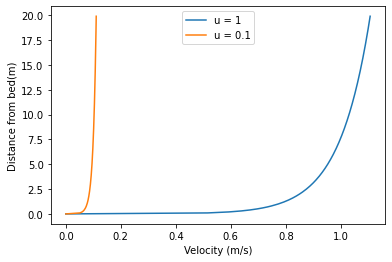

In [4]:
# we can transform the calculatin in a function, where we give u and z and return u(z)!

def calc_u_z(u, z):
    
    rho = 1000 
    cd = 0.002 
    tau = rho * cd * u**2
    u_f = (tau / rho)**.5
    k = 0.4
    z0 = 0.001 
    u_z = u_f/k * np.log(z / z0)

    return u_z

# using the function, we can calculate several situations of u and z with no need to repeat the code!
u_z1 = calc_u_z(1, z)
u_z01 = calc_u_z(0.1, z)


plt.plot(u_z1, z, label='u = 1')
plt.plot(u_z01, z, label='u = 0.1')

plt.xlabel('Velocity (m/s)')
plt.ylabel('Distance from bed(m)')
plt.legend()
plt.show()

Now we have the vertical profile of velocity and we can calculate the denominator of Ri, the squared vertical shear, or $S^2$. 

The $S^2$ is obtained by the ration between the differential of the u to the z. As u and z are numpy arrays, we don't need to calculate one by one... we can use the array properties of 'broadcast'

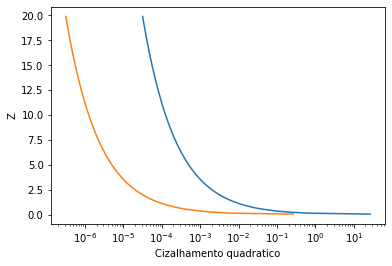

In [5]:
# funcion to find (du/dz)**2
def calc_s2(u, z):
    du = np.diff(u)   # differential of u = du
    dz = np.diff(z)   # differential of z = dz
    s2 = (du/dz)**2
    z2 = (z[:-1]+z[1:])/2  # the differential operation results in a N-1 values. Here we find the mean Z values between the original values.
    return s2, z2

s2_1, z2 = calc_s2(u_z1, z)
s2_01, z2 = calc_s2(u_z01, z)

plt.plot(s2_1, z2, label='u = 1')
plt.plot(s2_01, z2, label='u = 0.1')
plt.xlabel('Cizalhamento quadratico')
plt.ylabel('Z')
plt.xscale('log')  # commnet this line to see the plot with linear scale.
plt.show()

## Profile of density!

There is no equation that can provides a vertical profile of density! We can create on arbitrarly 

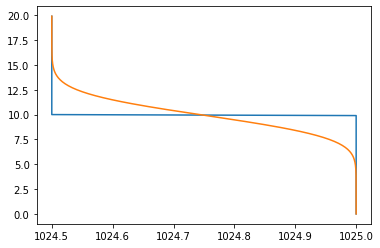

In [6]:
# a density of reference (salt water!)
rho_0 = 1025

# replicate the density value as much as the size of u_z, likewise a vertically homogeneous profile
rho_z = np.linspace(rho_0, rho_0, len(u_z))

rho_z2 = rho_z.copy()
rho_z2[int(len(u_z)/2):] = rho_z[int(len(u_z)/2):] - .5  # here we create 'stratification', reducing the density of the upper half by 0.5 

# however, a 'squared' stratification seems unnatural... we can smooth it a little using a filter 

rho_z3 = rho_z2.copy() # this do a 'deep' copy of the object!

for j in range(500): # to repeat the filtering... changing the number changes the smoothness! Try 50, 500 e 5000!
    for i in range(1, len(rho_z2)-1):
        rho_z3[i] = 1/4*rho_z3[i-1] + 1/2*rho_z3[i] + 1/4*rho_z3[i+1]  # this is moving window filter

plt.plot(rho_z2, z)
plt.plot(rho_z3, z)   

In [7]:
# now we can calculate the numerator of Ri, which is the bouyancy frequency = N2
def calc_N2(z, rho):
    dz = np.diff(z)
    drho = np.diff(rho) * -1 #the -1 is due the origin of z is the bed, and to calculate N2, it must be the surface!
    g = 9.8
    rho_0 = 1025

    return g/rho_0 * drho/dz

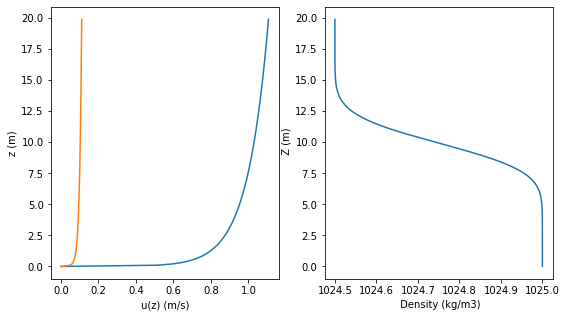

In [8]:
# checking the conditions of u(z) and rho(z)!

fig, axs = plt.subplots(1,2, figsize=(9,5))
axs[0].plot(u_z1, z)
axs[0].plot(u_z01, z)
axs[0].set_xlabel('u(z) (m/s)')
axs[0].set_ylabel('z (m)')

axs[1].plot(rho_z3, z)
axs[1].set_xlabel(' Density (kg/m3)')
axs[1].set_ylabel(' Z (m)')
plt.show()

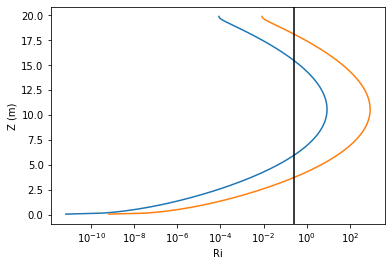

In [9]:
# just to remind the name of the variables!
# s2_1, z2 = calc_s2(u_z1, z)
# s2_01, z2 = calc_s2(u_z01, z)

N2 = calc_N2(z, rho_z3)

Ri_a = N2/s2_1
Ri_b = N2/s2_01


Ri_a = N2/s2_1
Ri_b = N2/s2_01
plt.plot(Ri_a, z2)
plt.plot(Ri_b, z2)
plt.xscale('log')
plt.axvline(0.25, color='k') # to indicate the threshold volue of 0.25
plt.xlabel('Ri')
plt.ylabel('Z (m)')
plt.show()

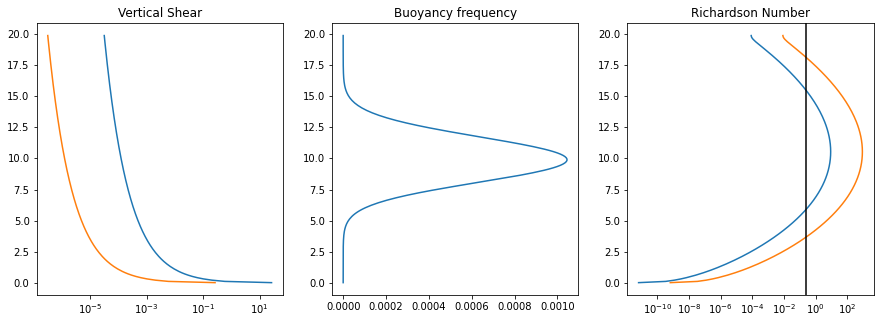

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot(s2_1, z2, label='u = 1')
ax[0].plot(s2_01, z2, label='u = 0.1')
ax[0].set_xscale('log')
ax[0].set_title('Vertical Shear')

ax[1].plot(N2, z2)
ax[1].set_title('Buoyancy frequency')

ax[2].plot(Ri_a, z2)
ax[2].plot(Ri_b, z2)
ax[2].set_title('Richardson Number')
ax[2].set_xscale('log')
ax[2].axvline(0.25, color='k')

plt.show()

## Interpretation:  

For u = 0.1 m/s, the Ri at the layer where occurs the stratification is higher than 0.25, indicating that the stratification is stable (will not mix). The same is also observed for u = 1 m/s, however the vertical limits of stability are narrows. 
